In [135]:
import json
import pandas as pd
import numpy
import numpy as np
import holoviews as hv
import datetime
%matplotlib inline
hv.notebook_extension()

In [142]:
with open('job_log_2016-11.json', 'r') as f:
    x = json.load(f)

data = []
for key, val in x.items():
    ID, user, process = key.split()
    for i in val:
        current_time, running_time, num_cores = i
        data.append(dict(ID=ID, user=user, process=process, current_time=current_time, 
                    running_time=running_time, num_cores=num_cores))

In [207]:
df = pd.DataFrame(data)
by_ID = df.groupby('ID')
df['elapsed_time'] = by_ID['current_time'].transform(lambda x: x-x.min())
df['running_time'] = by_ID['running_time'].transform(lambda x: x-x.min())
df['running_time'] = df['running_time'] / df['num_cores']
df['activity'] = df['running_time'] / df['elapsed_time'] * 100
df.index = pd.to_datetime(df.pop('current_time'), unit='s', utc=True)
df = df.sort_index()
lasts = by_ID.last().reset_index()

In [257]:
by_user = lasts.groupby('user')
elapsed_days = by_user.apply(lambda x: (x.elapsed_time * x.num_cores).sum() / 86400)
running_days = by_user.apply(lambda x: (x.running_time * x.num_cores).sum() / 86400)
user_df = elapsed_days.to_frame('elapsed_days').join(running_days.to_frame('running_days'))
user_df['activity'] = user_df.running_days / user_df.elapsed_days * 100

In [258]:
user_df

,elapsed_days,running_days,activity
user,,,
adriaanvuik,141.035163,62.774826,44.510053
afilipetti,57.541633,57.801377,100.451402
basnijholt,376.973505,308.787222,81.912182
behnammirza,1727.777336,9.755440,0.564624
jcelisgil,159.513643,156.970984,98.405993
mdoelman,1.874697,1.808854,96.487833
mgely,4.694275,0.261979,5.580823
mirfan,393.324343,94.640532,24.061702
mnowak,249.170339,96.038669,38.543379


# Sorted on activity

In [262]:
for user, row in user_df.sort_values('activity').iterrows():
    print('{} has {:.0f} days of computing and {:.1f}% time activity'.format(
            user, row.elapsed_days, row.activity))

behnammirza has 1728 days of computing and 0.6% time activity
mgely has 5 days of computing and 5.6% time activity
mirfan has 393 days of computing and 24.1% time activity
mnowak has 249 days of computing and 38.5% time activity
adriaanvuik has 141 days of computing and 44.5% time activity
rskolasinsk has 419 days of computing and 67.3% time activity
trosdahl has 533 days of computing and 77.8% time activity
basnijholt has 377 days of computing and 81.9% time activity
pchundru has 0 days of computing and 86.0% time activity
vribeirodec has 8 days of computing and 96.1% time activity
mdoelman has 2 days of computing and 96.5% time activity
jcelisgil has 160 days of computing and 98.4% time activity
afilipetti has 58 days of computing and 100.5% time activity
pperrin has 189 days of computing and 105.7% time activity


# Sorted on days

In [264]:
for user, row in user_df.sort_values('elapsed_days', ascending=False).iterrows():
    print('{} has {:.0f} days of computing and {:.1f}% time activity'.format(
            user, row.elapsed_days, row.activity))

behnammirza has 1728 days of computing and 0.6% time activity
trosdahl has 533 days of computing and 77.8% time activity
rskolasinsk has 419 days of computing and 67.3% time activity
mirfan has 393 days of computing and 24.1% time activity
basnijholt has 377 days of computing and 81.9% time activity
mnowak has 249 days of computing and 38.5% time activity
pperrin has 189 days of computing and 105.7% time activity
jcelisgil has 160 days of computing and 98.4% time activity
adriaanvuik has 141 days of computing and 44.5% time activity
afilipetti has 58 days of computing and 100.5% time activity
vribeirodec has 8 days of computing and 96.1% time activity
mgely has 5 days of computing and 5.6% time activity
mdoelman has 2 days of computing and 96.5% time activity
pchundru has 0 days of computing and 86.0% time activity


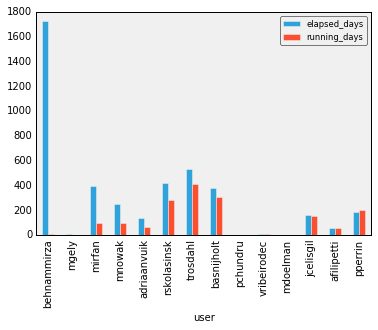

In [273]:
user_df.sort_values('activity').plot.bar(y=['elapsed_days', 'running_days'])